In [284]:
from sklearn.datasets import load_boston

In [285]:
boston_df = load_boston()

In [286]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [287]:
dir(boston_df)

['DESCR', 'data', 'feature_names', 'filename', 'target']

In [288]:
print(boston_df.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [289]:
data = pd.DataFrame(boston_df.data, columns = boston_df.feature_names)

In [290]:
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [291]:
boston_df.target.size

506

In [292]:
#data exploration with Pandas

In [293]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [294]:
#adding column price to the dataframe
data['PRICE'] = boston_df.target

In [295]:
data.count()

CRIM       506
ZN         506
INDUS      506
CHAS       506
NOX        506
RM         506
AGE        506
DIS        506
RAD        506
TAX        506
PTRATIO    506
B          506
LSTAT      506
PRICE      506
dtype: int64

# Data Cleaning 

In [296]:
#checking for the missing values
data.isnull().sum()

# no null value found

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

In [297]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


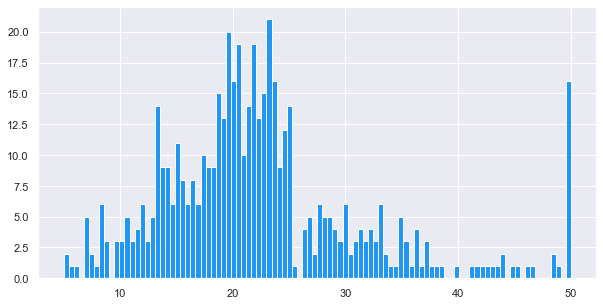

In [298]:
#EDA
plt.figure(figsize = (10,5))
data['PRICE'].hist(bins = 100, color = '#2196F3')

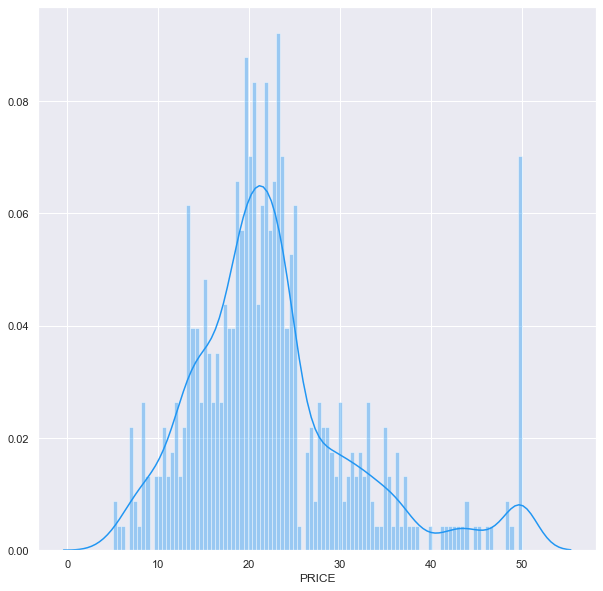

In [299]:
plt.figure(figsize= (10,10))
sns.distplot(data['PRICE'], bins = 100, color = '#2196F3', hist = True, kde = True)

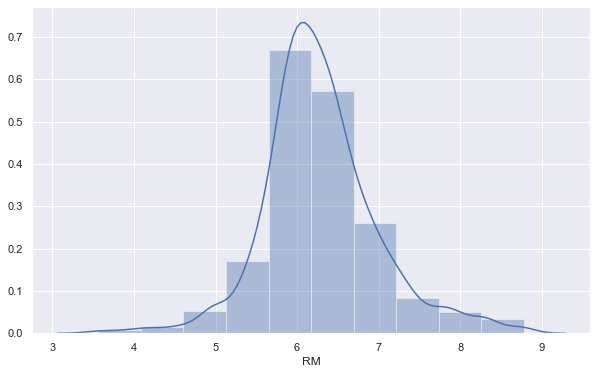

In [300]:
# now working on Room (RM)
plt.figure(figsize = (10,6))
sns.distplot(data['RM'], bins = 10)


insights
1. from the distplot, we can see that average rooms are 6, as the plot is densed around 6
 ( we can confirm this by checking the mean value of the RM columns by usng pandas function)

In [301]:
data['RM'].mean()

6.284634387351787

Now, lets just try to explore the RAD column

In [302]:
data['RAD'].unique()

#, we can see that accessibility to radial highways is divided into 9 different indexes, in which 1 means less accessible, 
# 24 means the highest accessible

array([ 1.,  2.,  3.,  5.,  4.,  8.,  6.,  7., 24.])

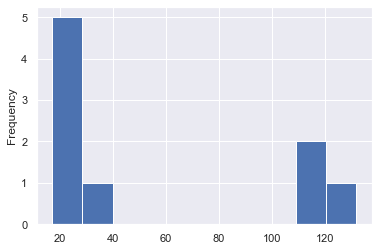

In [303]:
data['RAD'].value_counts().plot(kind = 'hist')

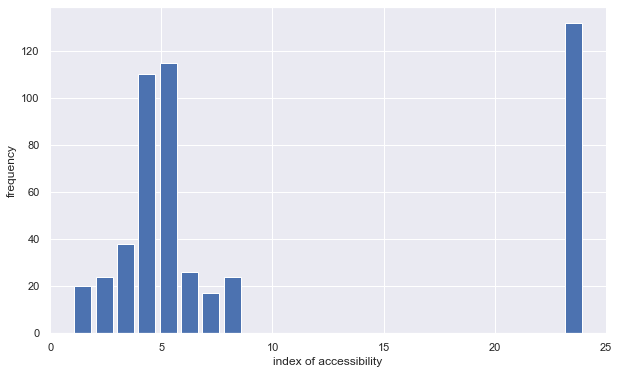

In [304]:
plt.figure(figsize = (10,6))
plt.hist(data['RAD'], bins = 24, rwidth=0.8)
plt.xlabel('index of accessibility')
plt.ylabel('frequency')
plt.show()

In [305]:
# working on CHAS river
data['CHAS'].value_counts()

# no of houses close to the river is 35 

0.0    471
1.0     35
Name: CHAS, dtype: int64

In [306]:
# descriptive analysis
data.min()
# minimum values in every column of the data

CRIM         0.00632
ZN           0.00000
INDUS        0.46000
CHAS         0.00000
NOX          0.38500
RM           3.56100
AGE          2.90000
DIS          1.12960
RAD          1.00000
TAX        187.00000
PTRATIO     12.60000
B            0.32000
LSTAT        1.73000
PRICE        5.00000
dtype: float64

In [307]:
#maximum values in every column of the data
data.max()

CRIM        88.9762
ZN         100.0000
INDUS       27.7400
CHAS         1.0000
NOX          0.8710
RM           8.7800
AGE        100.0000
DIS         12.1265
RAD         24.0000
TAX        711.0000
PTRATIO     22.0000
B          396.9000
LSTAT       37.9700
PRICE       50.0000
dtype: float64

In [308]:
# median of the all the columns
data.median()

CRIM         0.25651
ZN           0.00000
INDUS        9.69000
CHAS         0.00000
NOX          0.53800
RM           6.20850
AGE         77.50000
DIS          3.20745
RAD          5.00000
TAX        330.00000
PTRATIO     19.05000
B          391.44000
LSTAT       11.36000
PRICE       21.20000
dtype: float64

In [309]:
# mean of all the columns of the data
data.mean()

CRIM         3.613524
ZN          11.363636
INDUS       11.136779
CHAS         0.069170
NOX          0.554695
RM           6.284634
AGE         68.574901
DIS          3.795043
RAD          9.549407
TAX        408.237154
PTRATIO     18.455534
B          356.674032
LSTAT       12.653063
PRICE       22.532806
dtype: float64

In [310]:
# shortest way to performa all the above operations at one
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [311]:
# now, lets work on correlation
data['RM'].corr(data['PRICE'])
# there is postiive relationship 

0.695359947071539

In [312]:
data['PRICE'].corr(data['PTRATIO'])
# there is negative relation

-0.5077866855375615

In [313]:
cor = data.corr()

In [314]:
cor

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


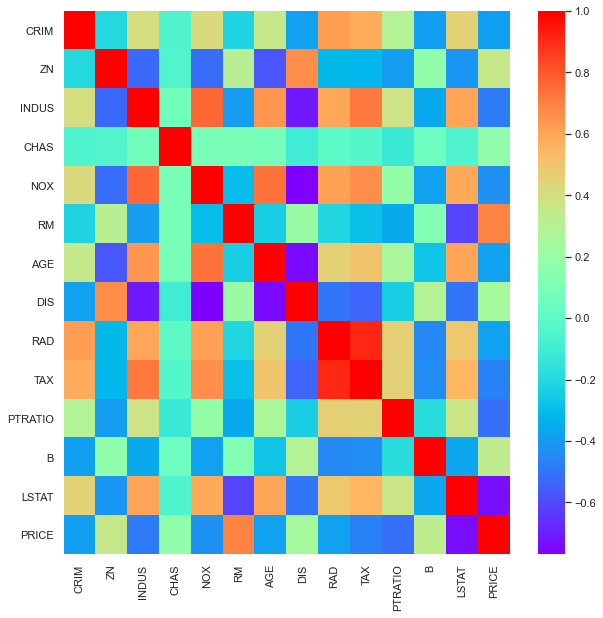

In [315]:
plt.figure(figsize = (10,10))
sns.heatmap(cor, cmap = 'rainbow')

Text(0, 0.5, 'Nitrogen Oxigen COncetrates')

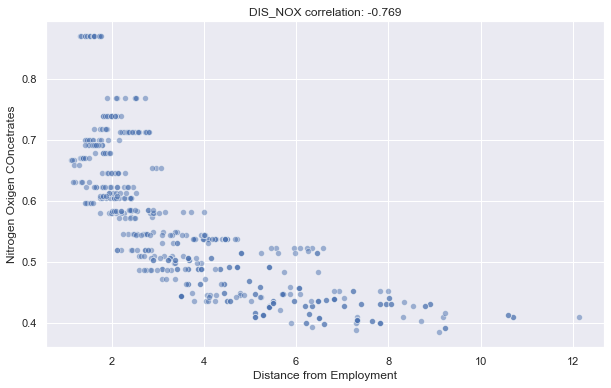

In [316]:
# relato ship between distance and pollution
dis_nox_cor = round(data['NOX'].corr(data['DIS']),3)

plt.figure(figsize=(10,6))
sns.scatterplot( x = data['DIS'], y = data['NOX'], alpha = 0.5)
plt.title(f'DIS_NOX correlation: {dis_nox_cor}')
plt.xlabel('Distance from Employment')
plt.ylabel('Nitrogen Oxigen COncetrates')

insights:
1. as we are moving far from the employment area, pollution is decreasing

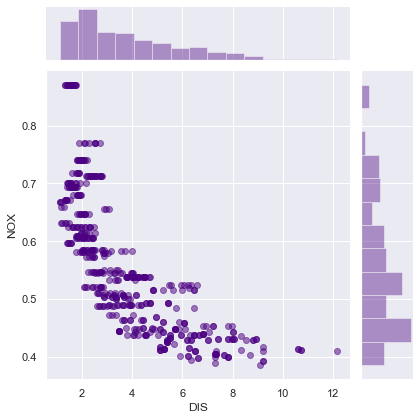

In [317]:
sns.set()
sns.set_context('notebook')
sns.set_style('darkgrid')
sns.jointplot(x = data['DIS'], y = data['NOX'],color = 'indigo', joint_kws={'alpha':0.5})

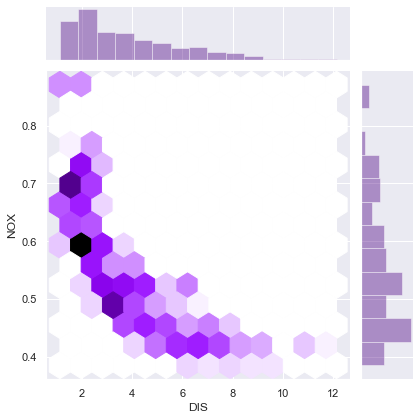

In [318]:
#plotting the same graph with some extra feautures provided by seaborn
sns.set()
sns.set_context('notebook')
sns.set_style('darkgrid')
sns.jointplot(x = data['DIS'], y = data['NOX'],color = 'indigo',kind='hex')

Now, we have noticed in the heatmap that there is high correlation between RAD and NOX which is 0.91.
On further exploring, we have noticed that the RAD is just the index value not the continuous data( correlation can be done bettween continuous variables only).

So, we want to explore these two variables and relation between them

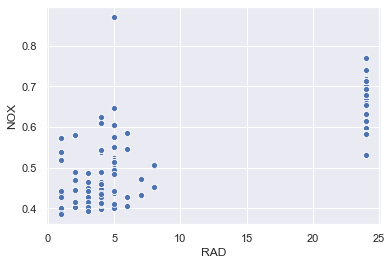

In [319]:
sns.scatterplot(x= data['RAD'], y = data['NOX'])

This graph doesnt represent the correlation of 0.91 as we got int the heatmap.
so, exploring further

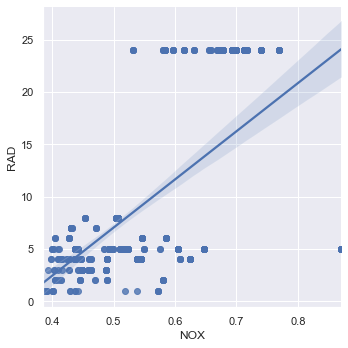

In [320]:
sns.lmplot( x = 'NOX', y = 'RAD', data = data)

PRICE VS RM ( Rooms)

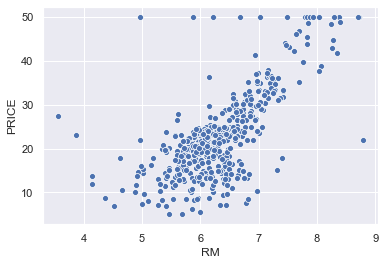

In [321]:
sns.scatterplot(x = data['RM'], y = data['PRICE'])

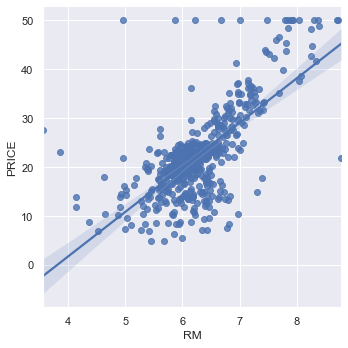

In [322]:
sns.lmplot(x = 'RM', y = 'PRICE', data = data)

Insights:
    we can see that no of rooms has a relationship with the PRICE

Wall time: 44.6 s


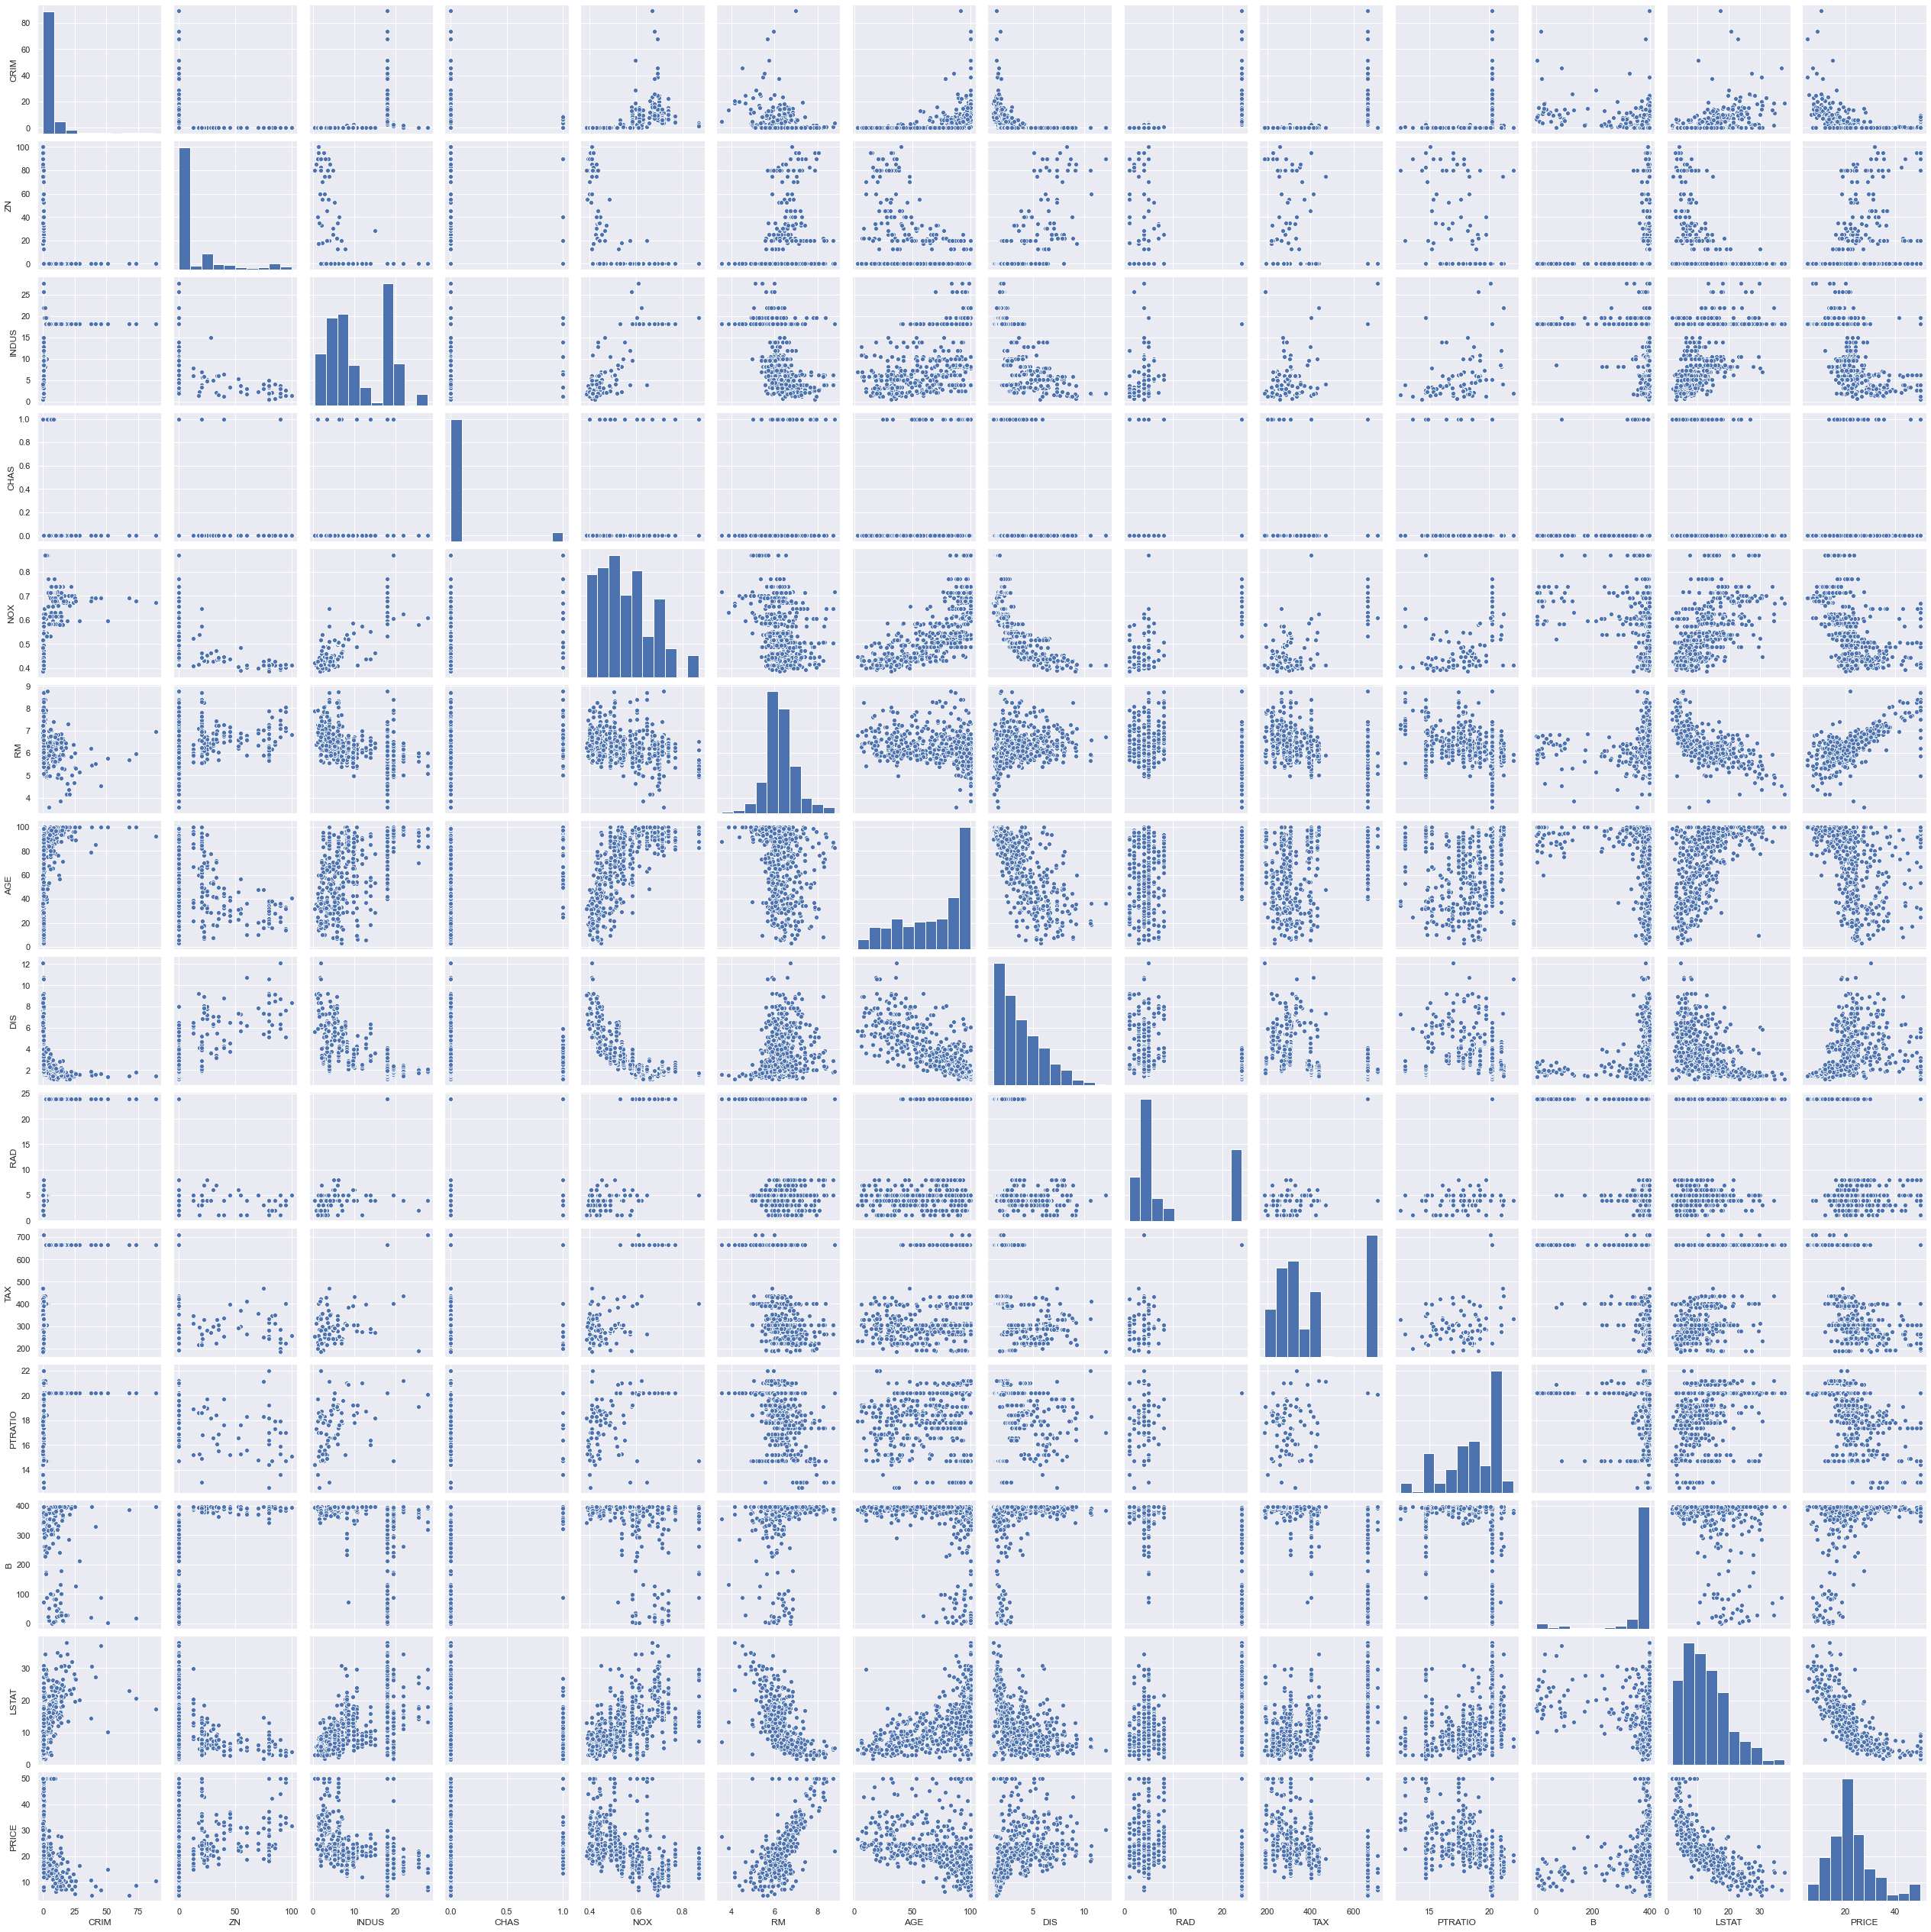

In [132]:
%%time
sns.pairplot(data)

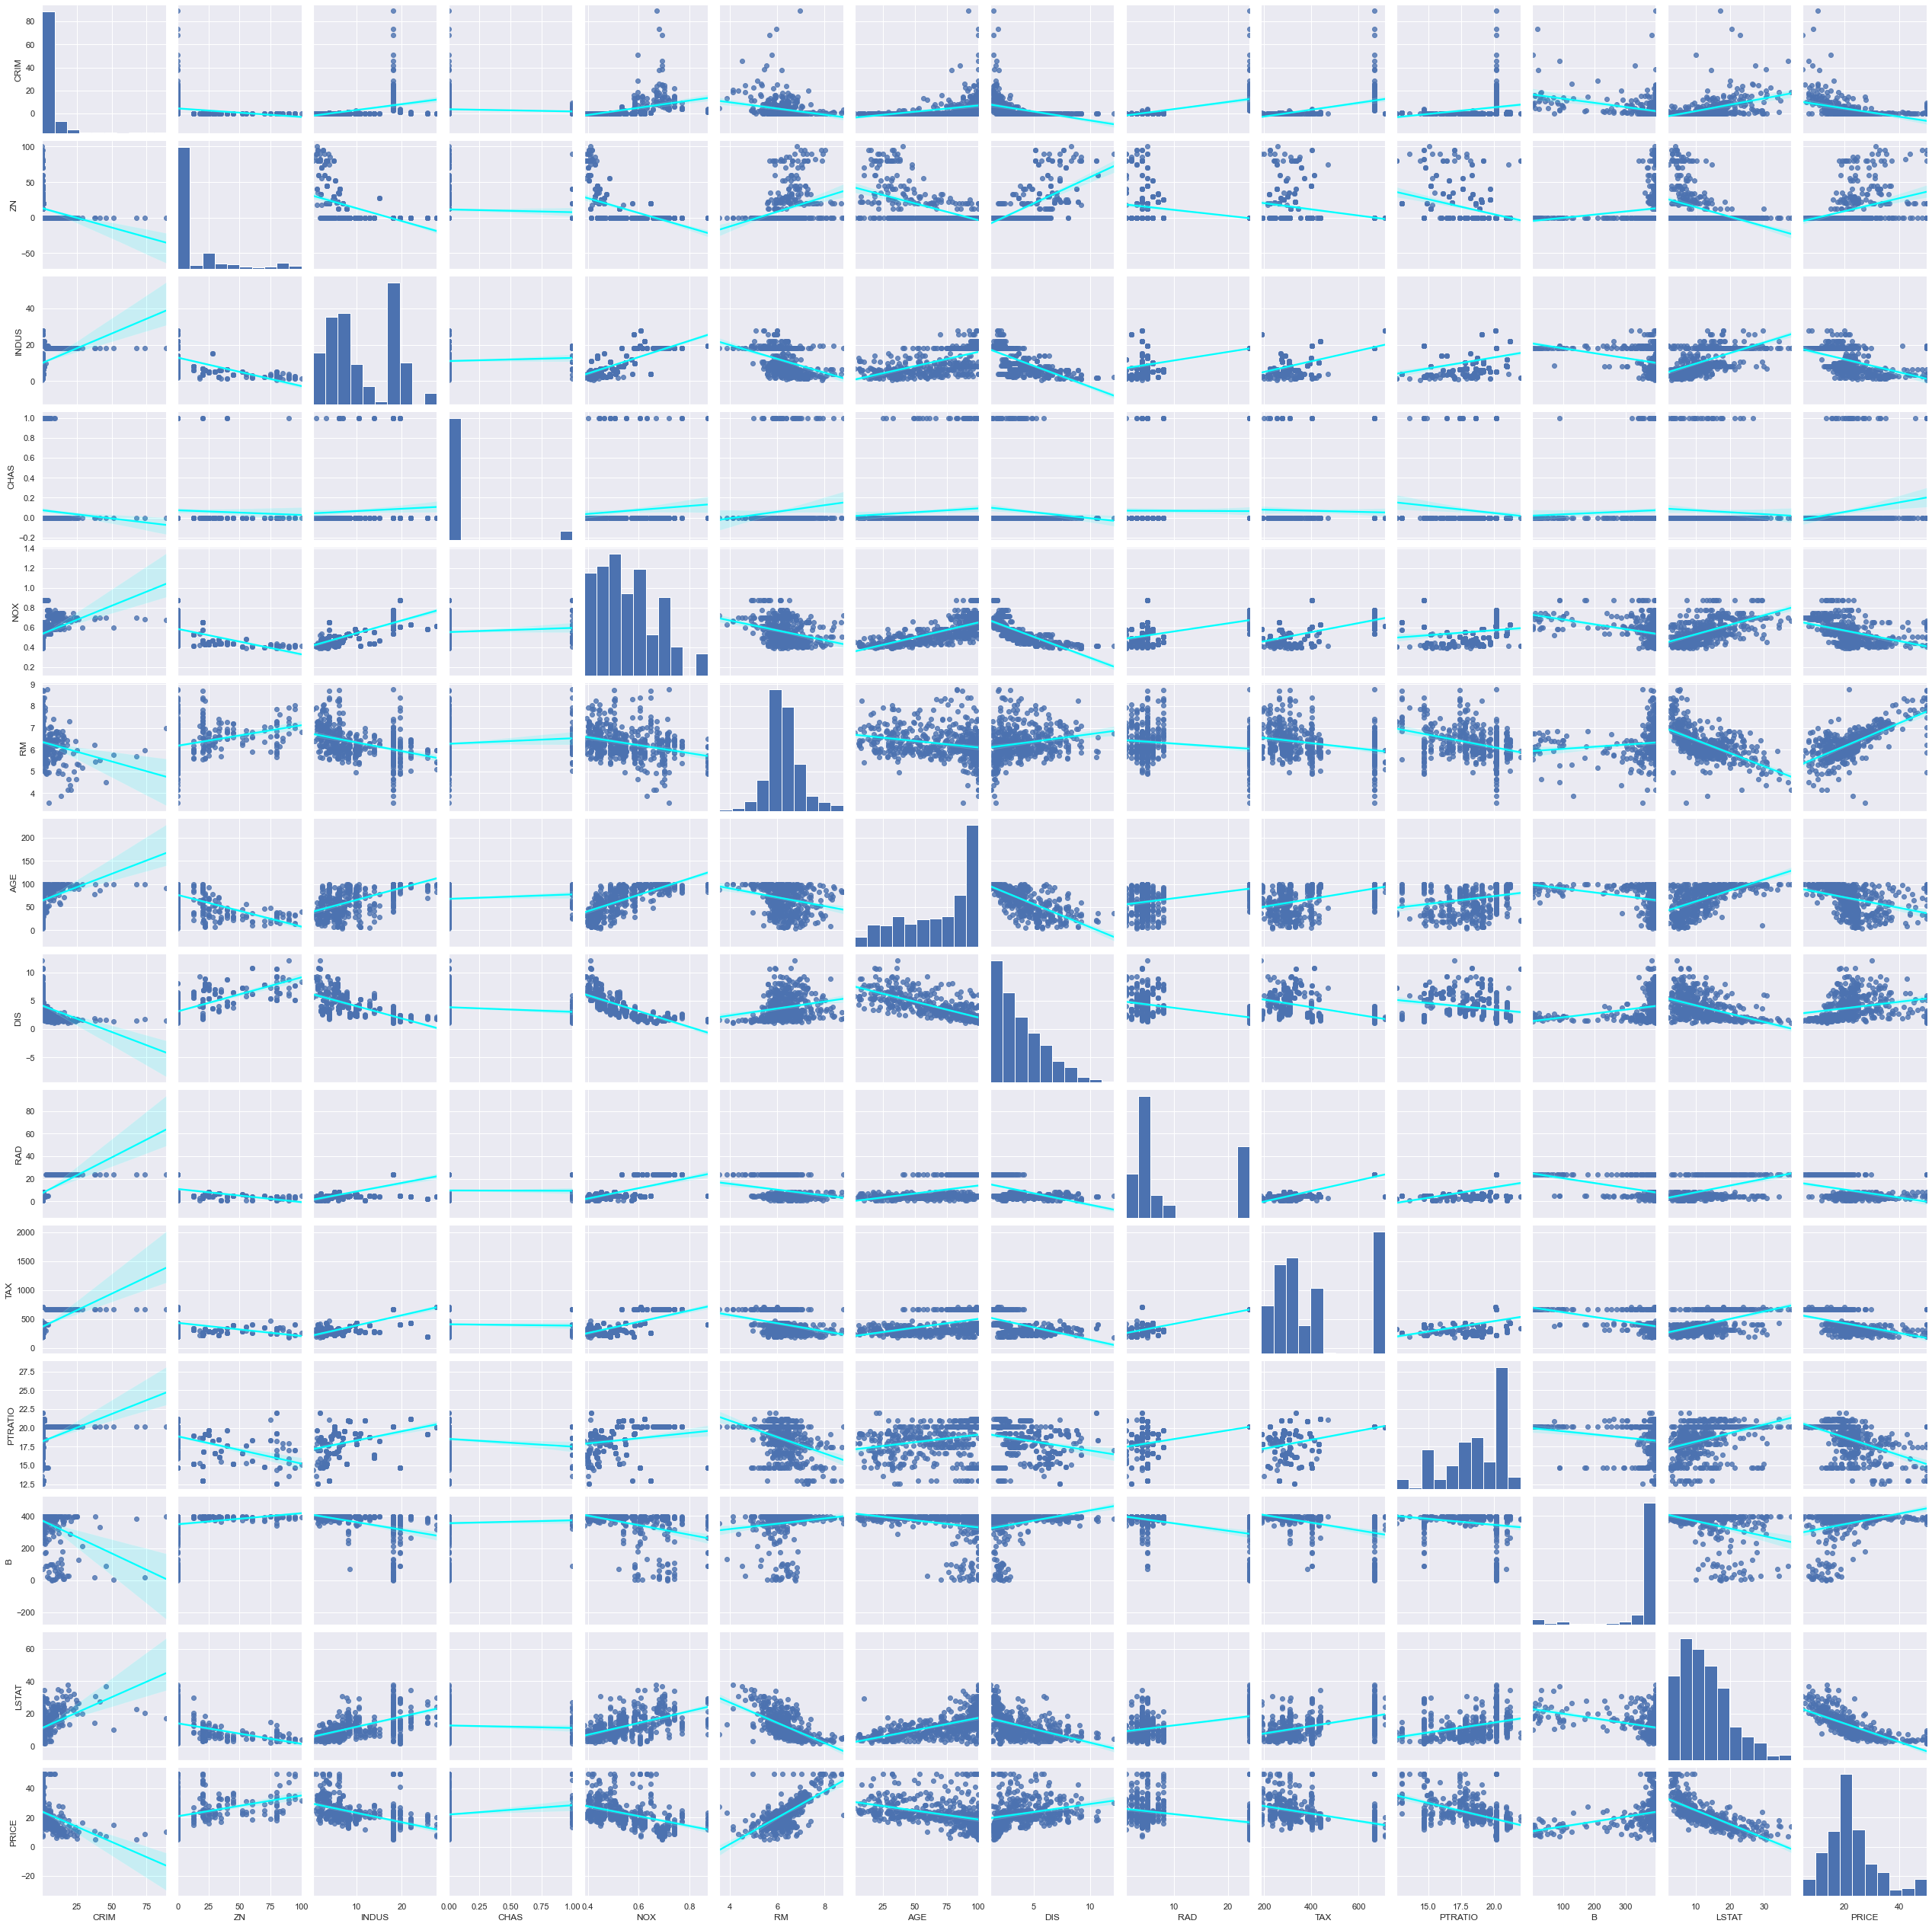

In [135]:
sns.pairplot(data, kind = 'reg', plot_kws={'line_kws':{'color':'cyan'}})

Train and Test data 

In [323]:
price = data['PRICE']
features = data.drop('PRICE', axis = 1)

In [324]:
from sklearn.model_selection import train_test_split

In [325]:
X_train, X_test, y_train, y_test = train_test_split(features, price, test_size = 0.2, random_state = 10)

In [326]:
from sklearn.linear_model import LinearRegression

In [327]:
model = LinearRegression()

In [328]:
model.fit(X_train, y_train)

LinearRegression()

In [329]:
print('The intercet',model.intercept_)

The intercet 36.53305138282439


In [330]:
print('The coefficient', model.coef_)

The coefficient [-1.28180656e-01  6.31981786e-02 -7.57627602e-03  1.97451452e+00
 -1.62719890e+01  3.10845625e+00  1.62922153e-02 -1.48301360e+00
  3.03988206e-01 -1.20820710e-02 -8.20305699e-01  1.14189890e-02
 -5.81626431e-01]


In [331]:
pd.DataFrame(data = model.coef_, index = X_train.columns, columns = ['coef'])

,coef
CRIM,-0.128181
ZN,0.063198
INDUS,-0.007576
CHAS,1.974515
NOX,-16.271989
RM,3.108456
AGE,0.016292
DIS,-1.483014
RAD,0.303988
TAX,-0.012082


In [332]:
print('R squared for train data', model.score(X_train, y_train))

R squared for train data 0.750121534530608


In [333]:
print('R squared of test data', model.score(X_test, y_test))

R squared of test data 0.6709339839115628


In [334]:
y_pred = model.predict(X_test)

In [335]:
pd.DataFrame(y_pred, y_test)
#here we can see the original values and predicted values by the model

,0
PRICE,
28.4,31.078964
31.1,31.721694
23.5,30.873149
26.6,22.282350
19.6,18.856061
...,...
24.4,22.417851
22.6,26.727575
19.8,23.201172


 we gonna use the following method to check the model performance
1.Rsquared
2.pvalues
3.VIF(Variation infloation factors)
4.BIC ( Bayesian Information Criterian)

# With the above model, we have performed multivariable linear regression without Transforming the data.
# we have seen that we have many outliers in the data.
# we want normal distributed data for the better performace of the model

In [336]:
data['PRICE'].skew()

1.1080984082549072

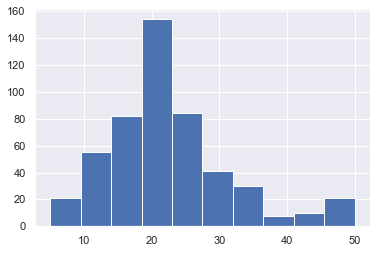

In [337]:
data['PRICE'].hist()

In [338]:
y_log = np.log(data['PRICE'])

In [339]:
y_log.head()

0    3.178054
1    3.072693
2    3.546740
3    3.508556
4    3.589059
Name: PRICE, dtype: float64

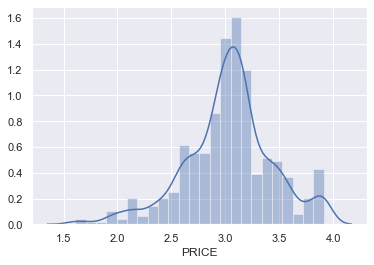

In [340]:
sns.distplot(y_log)

In [341]:
y_log.skew()

-0.33032129530987864

# here we can see that the skewness has been decreased from 1.1080984082549072


C:\Users\akshay\anaconda3\lib\site-packages\seaborn\regression.py:573: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


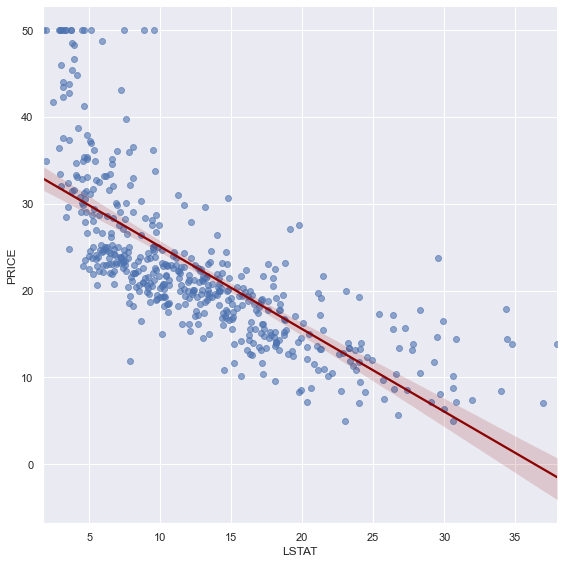

In [342]:
 # now price vs lstat
sns.lmplot(x= 'LSTAT', y = 'PRICE', data = data, size = 8, scatter_kws={'alpha':0.6}, line_kws={'color':'darkred'})

C:\Users\akshay\anaconda3\lib\site-packages\seaborn\regression.py:573: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


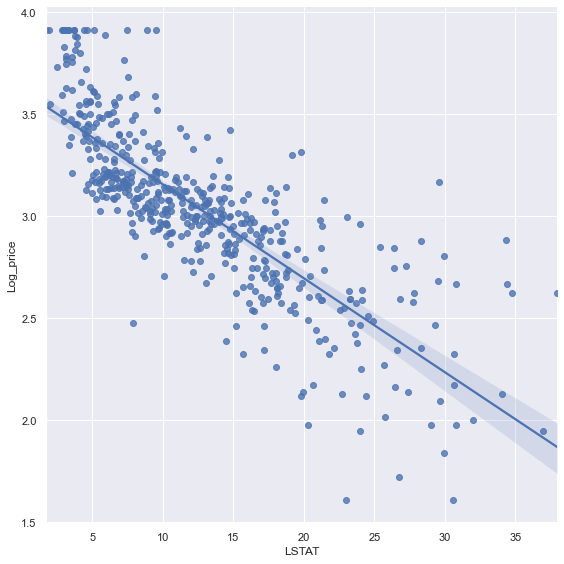

In [343]:
transformed_data = features
transformed_data['Log_price'] = y_log
sns.lmplot(x = 'LSTAT', y = 'Log_price', data = transformed_data, size = 8)

In [344]:
#Now, we build the model again by using the log price this time
price = np.log(data['PRICE'])
features = data.drop('PRICE', axis = 1)

In [345]:
X_train, X_test, y_train, y_test = train_test_split(features, price, test_size = 0.2, random_state = 10)

In [346]:
model = LinearRegression()

In [347]:
model.fit(X_train, y_train)

LinearRegression()

In [348]:
print('the intercept of train data',model.intercept_)
print('the r squared values of train data', model.score(X_train, y_train))
print('the r squared value of test data', model.score(X_test, y_test))
pd.DataFrame(data = model.coef_, columns = ['coef'], index= X_train.columns)

the intercept of train data 4.05994387177519
the r squared values of train data 0.7930234826697583
the r squared value of test data 0.7446922306260724


,coef
CRIM,-0.010672
ZN,0.001579
INDUS,0.002030
CHAS,0.080331
NOX,-0.704068
RM,0.073404
AGE,0.000763
DIS,-0.047633
RAD,0.014565
TAX,-0.000645


We have seen that the r squared value of the model has been increased

In [349]:
#lets change the log value to the original value
#charles river property 
np.e**0.080331
# this implies that people are willing to pay $1083 more to live close to the river

1.0836456950439142

In [350]:
# Now,we gonna check the significance of the model by evaluating p_value
import statsmodels.api as sm 

In [351]:
X_incl_cons = sm.add_constant(X_train)
result = sm.OLS(y_train, X_incl_cons).fit()


In [352]:
result.params

const      4.059944
CRIM      -0.010672
ZN         0.001579
INDUS      0.002030
CHAS       0.080331
NOX       -0.704068
RM         0.073404
AGE        0.000763
DIS       -0.047633
RAD        0.014565
TAX       -0.000645
PTRATIO   -0.034795
B          0.000516
LSTAT     -0.031390
dtype: float64

In [353]:
result.pvalues

const      1.188124e-52
CRIM       1.753774e-14
ZN         8.607727e-03
INDUS      4.445368e-01
CHAS       3.824015e-02
NOX        2.729624e-05
RM         1.089112e-04
AGE        2.091731e-01
DIS        1.812912e-07
RAD        3.746363e-07
TAX        5.145680e-05
PTRATIO    7.549821e-09
B          6.326839e-06
LSTAT      3.105305e-37
dtype: float64

In [354]:
pd.DataFrame({'coef':result.params, 'p_values':round(result.pvalues, 3)})

,coef,p_values
const,4.059944,0.000
CRIM,-0.010672,0.000
ZN,0.001579,0.009
INDUS,0.002030,0.445
CHAS,0.080331,0.038
NOX,-0.704068,0.000
RM,0.073404,0.000
AGE,0.000763,0.209
DIS,-0.047633,0.000
RAD,0.014565,0.000


In [355]:
# pvalues greater than 0.05, is not significant
# we can see that INDUS and AGE are not significant for this model
# testing for multicollinearity
#consequences of multicollinearity
#1.Loss of reliability
#2.high variablity in coeficient estimates
#3.strange finding(misleading or doesnt make sense)

# testing for mulitcollinearity ( VIF)

In [356]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [357]:
variance_inflation_factor(exog= X_incl_cons.values, exog_idx=1 )

1.7145250443932485

In [358]:
len(X_incl_cons.columns)

14

In [359]:
VIF = []
for i in range(X_incl_cons.shape[1]):
    VIF.append(variance_inflation_factor(exog = X_incl_cons.values, exog_idx = i))

In [360]:
VIF

[597.5487126763895,
 1.7145250443932485,
 2.3328224265597584,
 3.943448822674636,
 1.0788133385000578,
 4.410320817897635,
 1.8404053075678568,
 3.3267660823099408,
 4.222923410477865,
 7.314299817005058,
 8.508856493040817,
 1.839911632651406,
 1.3386713255364715,
 2.812544292793034]

In [361]:
pd.DataFrame({'coef_name':X_incl_cons.columns, 'vif':VIF})

,coef_name,vif
0,const,597.548713
1,CRIM,1.714525
2,ZN,2.332822
3,INDUS,3.943449
4,CHAS,1.078813
5,NOX,4.410321
6,RM,1.840405
7,AGE,3.326766
8,DIS,4.222923
9,RAD,7.314300


# if VIF is greater than 10, then we need to work of that particular columns.

# however we can see that all values of columns are lower than 10, so there is no multicollinearity exist

# model simplification ( BIC )

In [362]:
#Original model with log prices and all features
X_incl_cons = sm.add_constant(X_train)
result = sm.OLS(y_train, X_incl_cons).fit()
original_coef = pd.DataFrame({'coef':result.params, 'p_values':round(result.pvalues, 3)})
print('BIC', result.bic)
print('r squared', result.rsquared)

full_log_mse=round(result.mse_resid,3)
full_log_rsquared = round(result.rsquared,3)

BIC -139.74997769478875
r squared 0.7930234826697582


In [363]:
#reduced model 1
# excluding indus
X_incl_cons = sm.add_constant(X_train)
X_incl_cons= X_incl_cons.drop(['INDUS'], axis = 1)
result = sm.OLS(y_train, X_incl_cons).fit()
coef_minus_indus = pd.DataFrame({'coef':result.params, 'p_values':round(result.pvalues, 3)})
print('BIC', result.bic)
print('r squared', result.rsquared)

BIC -145.14508855591163
r squared 0.7927126289415163


In [364]:
#reduced model 2 
# excluding indus and age
X_incl_cons = sm.add_constant(X_train)
X_incl_cons= X_incl_cons.drop(['INDUS', 'AGE'], axis = 1)
result = sm.OLS(y_train, X_incl_cons).fit()
reduced_coef_indus_age = pd.DataFrame({'coef':result.params, 'p_values':round(result.pvalues, 3)})
print('BIC', result.bic)
print('r squared', result.rsquared)
reduced_log_mse=round(result.mse_resid,3)
reduced_log_rsquared = round(result.rsquared,3)

BIC -149.49934294224656
r squared 0.7918657661852815


Insights,we can see that even efter removing age and INDUS, BIC decreased more( good ) and r suqared remained safe

In [365]:
frames = [original_coef, coef_minus_indus, reduced_coef_indus_age]
pd.concat(frames, axis = 1)

,coef,p_values,coef,p_values,coef,p_values
const,4.059944,0.000,4.056231,0.000,4.035922,0.000
CRIM,-0.010672,0.000,-0.010721,0.000,-0.010702,0.000
ZN,0.001579,0.009,0.001551,0.010,0.001461,0.014
INDUS,0.002030,0.445,NaN,NaN,NaN,NaN
CHAS,0.080331,0.038,0.082795,0.032,0.086449,0.025
NOX,-0.704068,0.000,-0.673365,0.000,-0.616448,0.000
RM,0.073404,0.000,0.071739,0.000,0.076133,0.000
AGE,0.000763,0.209,0.000766,0.207,NaN,NaN
DIS,-0.047633,0.000,-0.049394,0.000,-0.052692,0.000
RAD,0.014565,0.000,0.014014,0.000,0.013743,0.000


In [366]:
## Residuals
price = data['PRICE']
features = data.drop(['AGE', 'INDUS', 'PRICE'], axis = 1)

In [367]:
X_train, X_test, y_train, y_test = train_test_split(features, price, test_size = 0.2, random_state = 10)

In [368]:
X_incl_cons = sm.add_constant(X_train)
result = sm.OLS(y_train, X_incl_cons).fit()





In [369]:
result.resid

50     -1.318763
367    11.407142
34      0.064690
78      0.390518
172     0.046465
         ...    
320    -1.125066
15     -0.045721
484     0.969653
125    -1.015288
265    -5.855131
Length: 404, dtype: float64

In [370]:
# graph oof actual vs predicted 
corr = y_train.corr(result.fittedvalues)

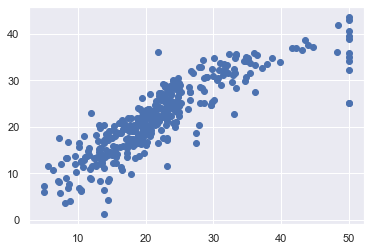

In [371]:
plt.scatter(x = y_train, y = result.fittedvalues)

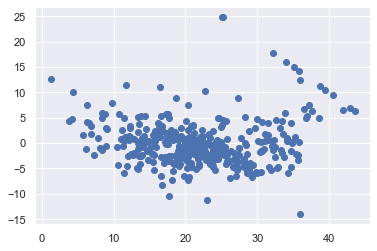

In [372]:
#plotting graph predictd vs residuals
plt.scatter(x = result.fittedvalues, y = result.resid, )

# we can see that residuals are centered around zero ( not systmetically high or low)

In [373]:
# distribution of residuals
resid_mean = round(result.resid.mean(),3)
resid_skew = round(result.resid.skew(),3)

Text(0.5, 1.0, 'Log price model :residuals')

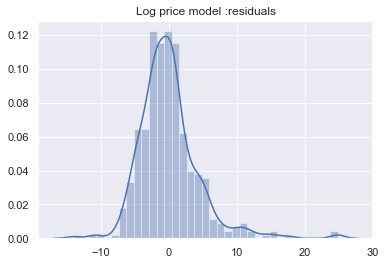

In [374]:
sns.distplot(result.resid)
plt.title('Log price model :residuals')

    # mean squared error and rsquared

In [377]:
# included all variable
pd.DataFrame({'R-Squared':{full_log_rsquared}, 'MSE':{full_log_mse}})

,R-Squared,MSE
0,{0.793},{0.035}


In [379]:
# not included the INDUS and AGE factor
pd.DataFrame({'R-Squared':{reduced_log_rsquared}, 'MSE':{reduced_log_rsquared}})

,R-Squared,MSE
0,{0.792},{0.792}
